In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
np.random.seed(2343243)

In [3]:
mean_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1 = np.random.multivariate_normal(mean_vec1, cov_mat1, 100)

In [5]:
mean_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2 = np.random.multivariate_normal(mean_vec2, cov_mat2, 100)

In [67]:
class1.shape
class2.shape

(100, 3)

In [ ]:
# Generate some data
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

X.shape

In [ ]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, proj3d

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111,projection='3d')
ax.plot(class1[:, 0], class1[:, 1], class1[:, 2], 'o')
ax.plot(class2[:, 0], class2[:, 1], class2[:, 2], '^')
plt.show()
plt.savefig('testplot.png')


In [18]:
all_data = np.concatenate((class1, class2))

In [64]:
pca = PCA(n_components = 3)
transformed_data = pca.fit_transform(all_data)
transformed_data.shape


(200, 3)

In [62]:
pca.components_

array([[ 0.83289251,  0.38221597,  0.40025119],
       [-0.44073062,  0.02065621,  0.89740172],
       [-0.3347336 ,  0.92384213, -0.18565869]])

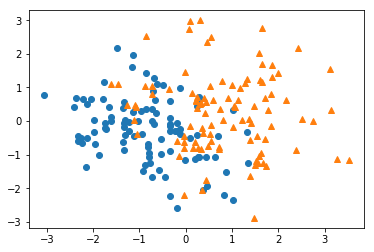

In [66]:
plt.plot(transformed_data[0:100,0],transformed_data[0:100,1],"o")
plt.plot(transformed_data[100:200,0],transformed_data[100:200,1],"^")
plt.show()

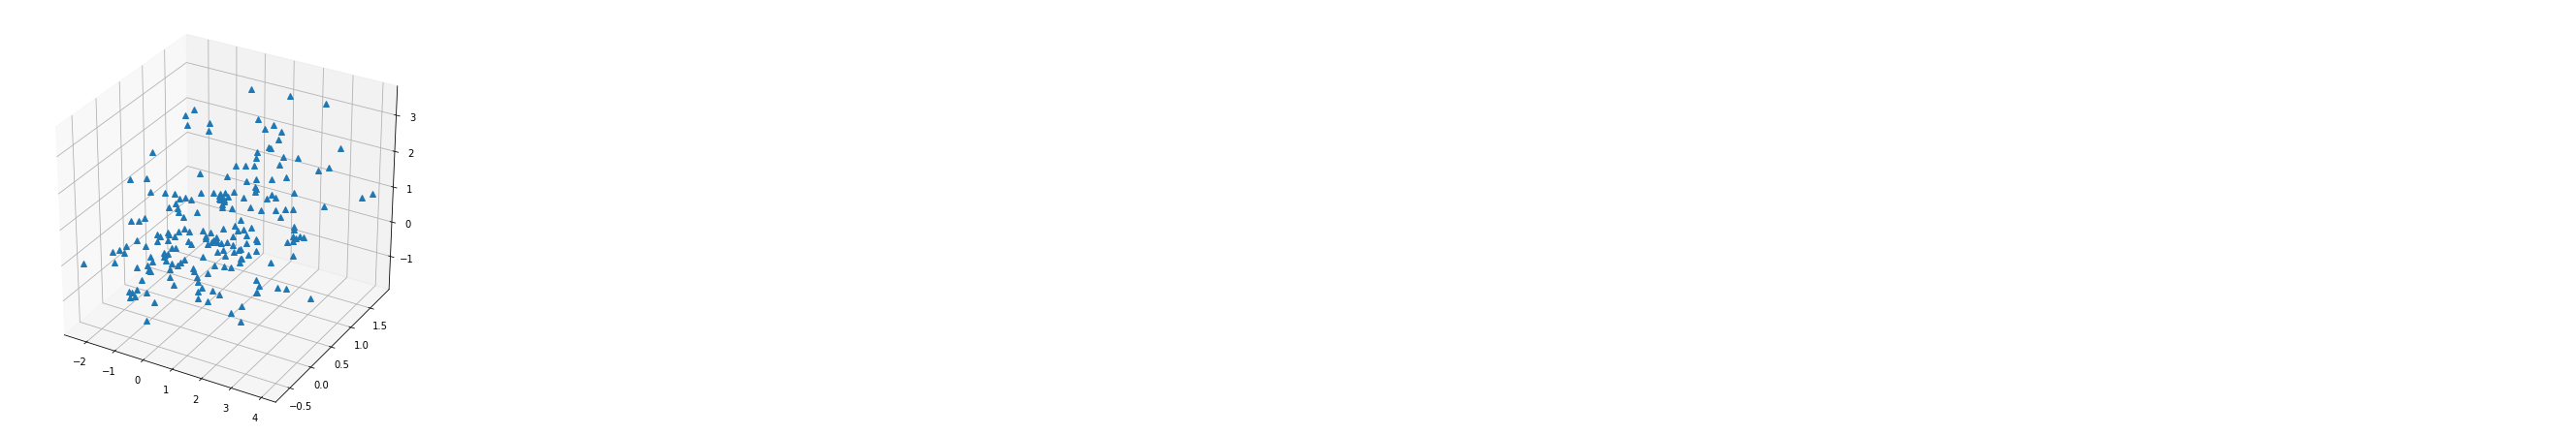

In [30]:
X_approx = pca.inverse_transform(transformed_data)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.plot(X_approx[:, 0], X_approx[:, 1], X_approx[:, 2], '^')
plt.show()

In [32]:
a = -0.409689
b = 7.2827
c = - 7.1008
i = 10
a * X_approx[i][0] + b* X_approx[i][1] + c * X_approx[i][2]

1.2479992623003764

# Using in-built function for Pca

In [33]:
all_data_t =  all_data.T
cov = np.cov(all_data_t)
cov

array([[1.49473974, 0.2348725 , 0.14386988],
       [0.2348725 , 1.03530561, 0.11892911],
       [0.14386988, 0.11892911, 1.2587081 ]])

In [34]:
eig_val, eig_vectors =  np.linalg.eig(cov)

eig_val, eig_vectors

(array([1.67166066, 1.19078843, 0.92630437]),
 array([[-0.83289251, -0.44073062,  0.3347336 ],
        [-0.38221597,  0.02065621, -0.92384213],
        [-0.40025119,  0.89740172,  0.18565869]]))

In [35]:
eigen_val_vector_pair = []
for i in range(len(eig_val)):
    eig_vec = eig_vectors[:, i]
    eigen_val_vector_pair.append((eig_val[i], eig_vec))

eigen_val_vector_pair.sort(reverse=True)
eigen_val_vector_pair

[(1.6716606590012315, array([-0.83289251, -0.38221597, -0.40025119])),
 (1.1907884262140813, array([-0.44073062,  0.02065621,  0.89740172])),
 (0.9263043700282564, array([ 0.3347336 , -0.92384213,  0.18565869]))]

In [36]:
pca.components_

array([[ 0.83289251,  0.38221597,  0.40025119],
       [-0.44073062,  0.02065621,  0.89740172]])

In [1]:
pca.explained_variance_

NameError: name 'pca' is not defined

In [2]:
import io
import random
from flask import Response
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure